# Lab 1: Inter-chip HD Calculations

**Objective:** Compute the individual Inter-chip HDs using the lab's bitstring data in a Jupyter Notebook. This data has been stored in the file 'NumSeeds0010.txt'.

The first thing we have to do is read the bitstrings from file, and make an XOR operation between bitstrings. Data contains 500 items, in total we should have \begin{equation*}
500 * 499 / 2 = 124750
\end{equation*} 

In [33]:
import numpy as np
from tqdm import tqdm

f = open('Files/NumSeeds0010.txt')
lines = f.readlines()
refLines = lines.copy()
numLines = len(lines)
HDs = []

for i in tqdm(range(numLines)):
    iStr = lines[i].strip()
    iLine = list(map(int, iStr))
    numChars = len(iLine)

    for j in range(numLines):
        if j <= i:
            continue

        jLine = list(map(int, refLines[j].strip()))
        count = np.sum(np.logical_xor(iLine, jLine))

        hd = 100.0 * count / numChars
        HDs.append(hd)

print(f"Total HDs: {len(HDs)}")

100%|██████████| 500/500 [04:13<00:00,  1.97it/s]

Total HDs: 124750


With this data we can plot the histogram, and calculate mean and standard deviation.


/Users/alexis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


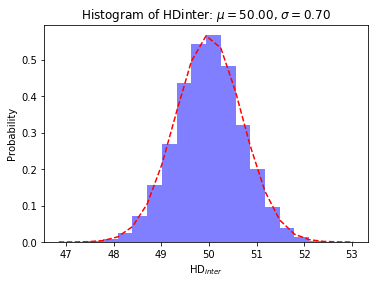

In [34]:
import matplotlib.pyplot as plt
import scipy.stats as stats

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(HDs, num_bins, normed=1, facecolor='blue', alpha=0.5)

# add a 'best fit' line
mu = np.mean(HDs)
sigma = np.std(HDs)
y = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('HD$_{inter}$')
plt.ylabel('Probability')
plt.title(r'Histogram of HDinter: $\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()


## Binomial Distribution

A binomial distribution is a discrete probability distribution that we are going to use to demonstrate how efficient is a chip's PUF uniqueness.

The following equation represents the binomial distribution:

\begin{equation*}
P(N)   = {n \choose N} p^N (1-p)^{ n-N}
\end{equation*}

The objective of the following code is to generate a binomial distribution and compare it and its mean and standar deviation with the data plotted in the previous image:


/Users/alexis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


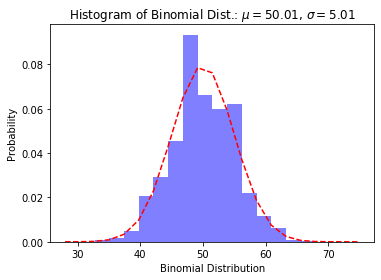

In [35]:
binomial = np.random.binomial(100.0, 0.5, 124750)

# the histogram of the data
n2, bins2, patches = plt.hist(binomial, num_bins, normed=1, facecolor='blue', alpha=0.5)

# add a 'best fit' line
mu2 = np.mean(binomial)
sigma2 = np.std(binomial)
y = stats.norm.pdf(bins2, mu2, sigma2)
plt.plot(bins2, y, 'r--')
plt.xlabel('Binomial Distribution')
plt.ylabel('Probability')
plt.title(r'Histogram of Binomial Dist.: $\mu={:.2f}$, $\sigma={:.2f}$'.format(mu2, sigma2))

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

The difference between the MEAN values is the following:

In [36]:
diff1 = mu2 * 100 / mu
print('{:.2f}%'.format(np.abs(100 - diff1)))


0.02%



The difference between the STANDARD DEVIATION values is the following:


In [37]:
diff2 = sigma2 * 100 / sigma
print('{:.2f}%'.format(np.abs(100 - diff2)))



612.70%


## Conclusions:

We can see that the original data compared with the binomial distribution have a similar MEAN value ; however, we can see very different values for STANDAR DEVIATION. It means that the bitstrings from the PUF chip are less scattered, and it confirms UNIQUENESS.

